<h1><center>Risk-Based Pricing</center></h1>
<h2><center>Minfei Xu</center></h2>
<h2><center>05/20/2020</center></h2>

# Objective

1. To select "good" customers to offer lower interest rates to increase our conversion from our past customers. 
2. Create an objective automated risk-base pricing and max loan amount system for renewal applications.

# Methodology

1. Perform regression analysis or fitting a model to select important features as criteria thresholds or
2. If the model is robust enough, we could use the score to generate score-based interest rates and max loan amount
3. Prepare a list of "good" customers to Marketing for campaign. (different query)

# Data Preparation

- We have enough renewal data with labels to perform supervised learning: 27778 observations.

- Target/Dependent feature: IfLoss - binary, whether the customers' most recent loan is profitable or not

- Independent features: 
        'Payroll Freq', 'PDType', 'EmploymentLength', 'Bankaccountlengthmonths',
       'Monthsatresidence', 'Salary', 'Age', 'RiskScore', 'NewFTScore','PreviousLoanAmt',
       'NumberOfLoansBefore', 'Profit_Recent','Profit_Historical', 
       'Profit_Previous', 'WOEntries_Previous', 'WOEntries_Historical',
       'WOAmount_Previous', 'WOAmount_Historical', 'YearsWithUs',
       'Non-Active Duration', 'PTI', 'HistoricalLoanAmt', 
       'StaticPool_Historical', 'StaticPool_Previous'

In [14]:
# Customize Figure Style to Jupyter Themes
# import jtplot module in notebook
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='onedork')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

# reset default matplotlib rcParams
# jtplot.reset()

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("fivethirtyeight")

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.externals import joblib

# import MPD data - renewal customers that are currently stored or written off
# renewal = pd.read_csv('C:/Users/brigh/OneDrive - The Strategic Group/MPD-MFC/Risk-based Pricing/renewal data.csv')
renewal = pd.read_csv('C:/Users/brigh/OneDrive - The Strategic Group/MPD-MFC/Risk-based Pricing/renewal data 040821.csv')
renewal.describe()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


,Bankaccountlengthmonths,Monthsatresidence,Salary,Age,RiskScore,NewFTScore,TotalLoanAmt,RecentLoanAmt,PreviousLoanAmt,NumberOfLoansBefore,...,Pay_Historical,Profit_Historical,Pay_Previous,Profit_Previous,WOEntries_Previous,WOEntries_Historical,WOAmount_Previous,WOAmount_Historical,YearsWithUs,Non-Active Duration
count,18653.000000,22598.000000,2.880400e+04,30253.000000,8656.000000,1779.000000,30253.000000,30253.000000,30062.000000,30253.000000,...,30253.000000,30253.00000,30055.000000,30055.000000,30055.000000,30151.000000,30055.000000,30151.000000,30148.000000,30148.000000
mean,62.317590,57.429596,5.375094e+03,41.618881,806.757163,729.675660,1958.059399,493.289922,385.140709,2.882921,...,2867.525210,1402.77156,1009.764218,624.663569,0.014740,0.021823,-6.674933,-10.290759,314.177226,107.121467
std,122.292436,68.652952,2.130038e+05,38.001161,28.494591,36.904933,2597.412526,233.953332,174.582658,4.224226,...,4603.046345,2511.17062,979.986286,924.306584,0.120787,0.146789,58.767663,74.292370,529.391831,330.638109
min,0.000000,0.000000,1.000000e+01,-5953.000000,111.000000,111.000000,-298.000000,0.000000,-300.000000,1.000000,...,-140.000000,-2586.00000,0.000000,-1000.000000,0.000000,0.000000,-1500.000000,-1500.000000,-764.000000,-23.000000
25%,20.000000,16.000000,2.200000e+03,33.000000,789.000000,704.000000,900.000000,300.000000,300.000000,1.000000,...,650.000000,150.00000,437.500000,120.000000,0.000000,0.000000,0.000000,0.000000,49.000000,3.000000
50%,35.000000,36.000000,3.000000e+03,41.000000,803.000000,724.000000,1200.000000,500.000000,400.000000,1.000000,...,1310.000000,570.00000,716.490000,300.000000,0.000000,0.000000,0.000000,0.000000,115.000000,15.000000
75%,70.000000,72.000000,4.314075e+03,49.000000,824.000000,752.000000,2000.000000,600.000000,500.000000,3.000000,...,3080.000000,1553.00000,1240.000000,780.000000,0.000000,0.000000,0.000000,0.000000,324.000000,70.000000
max,6012.000000,980.000000,3.600384e+07,1054.000000,878.000000,841.000000,66800.000000,1500.000000,1500.000000,98.000000,...,82575.000000,42536.00000,16978.500000,16478.500000,2.000000,2.000000,0.000000,0.000000,5984.000000,5894.000000


# Data Preprocessing

In [184]:
# clean Salary
list_i = []
list_j = []
for i in renewal['Salary']:
#     print(i, type(i))
    if type(i) == str:
        if i[0] == '$':
            i = i[1:]
        if i[1] == '.' and i[-3] == '.':
            i = i[0] + i[2:]
    list_i.append(i)

for j in renewal['EmploymentLength']:
    if type(j) == str:
        if 'N' in j or '/' in j or 'o' in j or 'NULL' in j or j == '':
            j = 0
    list_j.append(j)
renewal['Salary'] = list_i
renewal['EmploymentLength'] = list_j
renewal['EmploymentLength'].fillna(3, inplace = True)

In [185]:
# renewal = renewal[pd.to_datetime(renewal['FirstDateEver']) >= '2019-01-01']
renewal = renewal[(renewal['PreviousLoanAmt'].isnull() == False) & (renewal['PreviousLoanAmt'] != 0) #& (data['LastPaymentDate'].isnull() == False)
                 & (renewal['RecentLoanAmt'] != 0) & (renewal['Pay_Previous'].isnull() == False) & (renewal['YearsWithUs'] >= 0)]
#     data['Age'] = (pd.to_datetime(data['FundedDate_Recent']) - pd.to_datetime(data['DOB']))/np.timedelta64(1,'Y')
renewal['Salary'] = renewal['Salary'].astype(float)
renewal['PreviousLoanAmt'] = renewal['PreviousLoanAmt'].astype(float)
renewal['Bankaccountlengthmonths'] = renewal['Bankaccountlengthmonths'].astype(float)
renewal['Monthsatresidence'] = renewal['Monthsatresidence'].astype(float)
renewal['EmploymentLength'] = renewal['EmploymentLength'].astype(float)
renewal['Salary'].fillna(renewal['Salary'].median(), inplace = True)
renewal['Bankaccountlengthmonths'].fillna(renewal['Bankaccountlengthmonths'].median(), inplace = True)
renewal['Monthsatresidence'].fillna(renewal['Monthsatresidence'].median(), inplace = True)
renewal['PTI'] = renewal['Salary']/renewal['RecentLoanAmt']
renewal['Payroll Freq'] = renewal['Payroll Freq']
renewal['HistoricalLoanAmt'] = renewal['TotalLoanAmt'] - renewal['RecentLoanAmt']
renewal['StaticPool_Recent'] = renewal['Pay_Recent']/renewal['RecentLoanAmt']
renewal['StaticPool_Historical'] = renewal['Pay_Historical']/(renewal['TotalLoanAmt'] - renewal['RecentLoanAmt'])
renewal['StaticPool_Previous'] = renewal['Pay_Previous']/renewal['PreviousLoanAmt']
renewal['StaticPool_Overall'] = renewal['TotalPay']/renewal['TotalLoanAmt']

## Check Missing

In [186]:
renewal.isnull().mean()

SSN                        0.000000
FirstDateEver              0.000000
FundedDate_Recent          0.000000
LastPaymentDate            0.000000
Payroll Freq               0.000000
PDType                     0.000000
EmploymentLength           0.000000
Bankaccountlengthmonths    0.000000
Monthsatresidence          0.000000
Salary                     0.000000
Age                        0.000000
RiskScore                  0.711951
NewFTScore                 0.940893
TotalLoanAmt               0.000000
RecentLoanAmt              0.000000
PreviousLoanAmt            0.000000
NumberOfLoansBefore        0.000000
TotalPay                   0.000000
Pay_Recent                 0.000000
Profit_Recent              0.000000
Pay_Historical             0.000000
Profit_Historical          0.000000
Pay_Previous               0.000000
Profit_Previous            0.000000
WOEntries_Previous         0.000000
WOEntries_Historical       0.000000
WOAmount_Previous          0.000000
WOAmount_Historical        0

In [187]:
d = {'Written Off': 1, 'Stored': 0}
renewal.replace(d, inplace = True)

In [188]:
renewal['IfLoss'] = np.where(renewal['StaticPool_Recent'] < 1, 1, 0)
renewal[['IfLoss', 'PDType']].describe()

,IfLoss,PDType
count,30047.000000,30047.000000
mean,0.197391,0.484940
std,0.398036,0.499781
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [189]:
renewal.to_csv('renewal.csv')

In [190]:
def find_cat_and_num(dataset):
    cat_vars = [col for col in dataset.columns if dataset[col].dtypes == 'O']
    num_vars  = [col for col in dataset.columns if dataset[col].dtypes != 'O']
    return cat_vars, num_vars
                 
categorical, numerical = find_cat_and_num(renewal)  

## Pearson Correlation Check

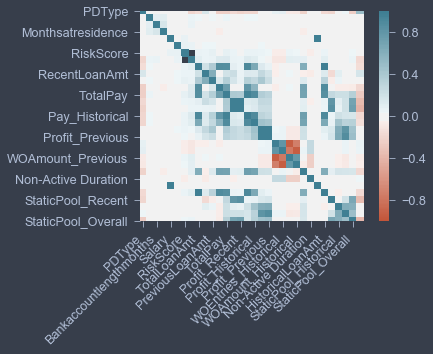

In [197]:
corr = renewal.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
# corr

In [204]:
# separate data into train set and test set
from sklearn.model_selection import train_test_split

data = renewal[['StaticPool_Recent', 'Profit_Recent', 'PDType', 'StaticPool_Historical', 'StaticPool_Previous', 'Age', 'IfLoss', 'YearsWithUs', 'NumberOfLoansBefore', 'Non-Active Duration', 'Profit_Previous', 'Profit_Historical', \
                'Salary', 'RecentLoanAmt', 'PreviousLoanAmt', 'HistoricalLoanAmt', 'Bankaccountlengthmonths', 'Monthsatresidence', 'EmploymentLength', 'WOEntries_Previous', 'WOEntries_Historical']]
X_train_raw, X_test_raw, y_train, y_test = train_test_split(data, data.IfLoss, test_size = 0.3, random_state = 0)
X_train = X_train_raw[['StaticPool_Historical', 'StaticPool_Previous', 'Age', 'YearsWithUs', 'NumberOfLoansBefore', 'Non-Active Duration',  'PreviousLoanAmt', 'HistoricalLoanAmt',  'Bankaccountlengthmonths', 'Monthsatresidence', 'EmploymentLength', 'WOEntries_Historical']]
X_test = X_test_raw[['StaticPool_Historical', 'StaticPool_Previous','Age', 'YearsWithUs', 'NumberOfLoansBefore', 'Non-Active Duration', 'PreviousLoanAmt', 'HistoricalLoanAmt',  'Bankaccountlengthmonths', 'Monthsatresidence', 'EmploymentLength', 'WOEntries_Historical']]

## Features for Training

In [205]:
X_train_raw.columns

Index(['StaticPool_Recent', 'Profit_Recent', 'PDType', 'StaticPool_Historical',
       'StaticPool_Previous', 'Age', 'IfLoss', 'YearsWithUs',
       'NumberOfLoansBefore', 'Non-Active Duration', 'Profit_Previous',
       'Profit_Historical', 'Salary', 'RecentLoanAmt', 'PreviousLoanAmt',
       'HistoricalLoanAmt', 'Bankaccountlengthmonths', 'Monthsatresidence',
       'EmploymentLength', 'WOEntries_Previous', 'WOEntries_Historical'],
      dtype='object')

# Algorithm Fitting and Evaluation

## xgBoost

In [206]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score

xgb_model = xgb.XGBClassifier()

eval_set = [(X_test, y_test)]
xgb_model.fit(X_train, y_train, eval_metric="auc", eval_set = eval_set, verbose=False)
joblib.dump(xgb_model, 'xgb_renewal_model.pkl')

pred_prob = xgb_model.predict_proba(X_train)
print('xgb train roc-auc: {}'.format(roc_auc_score(y_train, pred_prob[:,1])))
pred_prob = xgb_model.predict_proba(X_test)
print('xgb test roc-auc: {}'.format(roc_auc_score(y_test, pred_prob[:,1])))

y_pred = xgb_model.predict(X_test)
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
precision = cm[1,1]/(cm[1,1] + cm[0,1])
recall = cm[1,1]/(cm[1,1] + cm[1,0])
F1 = 2/((1/precision) + (1/recall))
print(cm)
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print('F-1 Score: {}'.format(F1))

xgb train roc-auc: 0.8265943673747456
xgb test roc-auc: 0.8163464231936857
[[7046  165]
 [1586  218]]
Precision: 0.5691906005221932
Recall: 0.12084257206208426
Accuracy: 0.8057681641708264
F-1 Score: 0.19935985368084136


## GBDT

In [157]:
from sklearn.externals import joblib

gbr = GradientBoostingClassifier(n_estimators=3000, max_depth=2, min_samples_split=2, learning_rate=0.1)
gbr.fit(X_train, y_train.ravel())
# joblib.dump(gbr, 'train_model_result5.m')   # 保存模型
# joblib.dump(gbr, "gbr_model.pkl")

y_gbr_train = gbr.predict(X_train)
y_pred = gbr.predict(X_test)

y_prob_train = gbr.predict_proba(X_train)
pred_prob = gbr.predict_proba(X_test)
print('GBDT train roc-auc: {}'.format(roc_auc_score(y_train, y_prob_train[:,1])))
print('GBDT test roc-auc: {}'.format(roc_auc_score(y_test, pred_prob[:,1])))

acc_train = gbr.score(X_train, y_train)
acc_test = gbr.score(X_test, y_test)
# print(y_prob)
print('GBDT train accuracy: {}'.format(acc_train))
print('GBDT test accuracy: {}'.format(acc_test))


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
precision = cm[1,1]/(cm[1,1] + cm[0,1])
recall = cm[1,1]/(cm[1,1] + cm[1,0])
F1 = 2/((1/precision) + (1/recall))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print('F-1 Score: {}'.format(F1))

GBDT train roc-auc: 0.8948606528293096
GBDT test roc-auc: 0.8097860161289678
GBDT train accuracy: 0.8521776340813998
GBDT test accuracy: 0.8004437049362174
[[6763  448]
 [1351  453]]
Precision: 0.5027746947835738
Recall: 0.25110864745011086
Accuracy: 0.8004437049362174
F-1 Score: 0.33493530499075785


## Random Forest

In [158]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF train roc-auc: 0.9993895962320833
RF test roc-auc: 0.7624049055381944


## Logistic Regression

In [159]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression(random_state = 0)
logit_model.fit(X_train, y_train)

pred_prob = logit_model.predict_proba(X_train)
print('Logistic Regression train roc-auc: {}'.format(roc_auc_score(y_train, pred_prob[:,1])))
pred_prob = logit_model.predict_proba(X_test)
print('Logistic Regression test roc-auc: {}'.format(roc_auc_score(y_test, pred_prob[:,1])))

y_pred = logit_model.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Precision: {}'.format(cm[1,1]/(cm[1,1] + cm[0,1])))
print('Recall: {}'.format(cm[1,1]/(cm[1,1] + cm[1,0])))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression train roc-auc: 0.7586085729579493
Logistic Regression test roc-auc: 0.7718571589782917
[[7194   17]
 [1784   20]]
Precision: 0.5405405405405406
Recall: 0.011086474501108648


In [160]:
import statsmodels.api as sm

model = sm.Logit(y_train, X_train)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.434541
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 IfLoss   No. Observations:                21032
Model:                          Logit   Df Residuals:                    21020
Method:                           MLE   Df Model:                           11
Date:                Thu, 08 Apr 2021   Pseudo R-squ.:                  0.1224
Time:                        23:15:44   Log-Likelihood:                -9139.3
converged:                       True   LL-Null:                       -10413.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
StaticPool_Historical       0.0220      0.026      0.842      0.400      -0.029       0.073
StaticPool_Previous        -0.0591      0.017     -3.486      0.000      -0.092      -0.026
Age                        -0.0051      0.001     -3.711      0.000      -0.008      -0.002
YearsWithUs                -0.0001      0.000     -0.778      0.437      -0.000       0.000
NumberOfLoansBefore        -0.4778      0.041    -11.688      0.000      -0.558      -0.398
Non-Active Duration         0.0002   5.37e-05      3.479      0.001    8.15e-05       0.000
PreviousLoanAmt             0.0018      0.000     11.227      0.000       0.001       0.002
HistoricalLoanAmt          -0.0010   8.54e-05    -11.241      0.000      -0.001      -0.001
Bankaccountlengthmonths    -0.0018      0.000     -5.298      0.000      -0.002      -0.001
Monthsatresidence          -0.0007      0.000     -2.262      0.024      -0.001   -9.85e-05
EmploymentLength           -0.0060      0.002     -2.830      0.005      -0.010      -0.002
WOEntries_Historical        0.7268      0.118      6.162      0.000       0.496       0.958
===========================================================================================
"""

## Detailed Results of xgBoost Model 

### ROC-AUC Visualization

No Skill: ROC AUC=0.500
xgBoost: ROC AUC=0.816


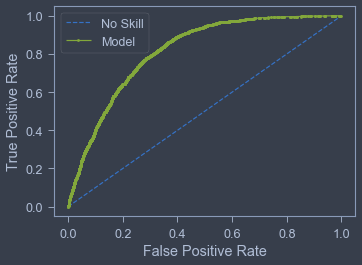

In [198]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# # fit a model
# model = LogisticRegression(solver='lbfgs')
# model.fit(X_train[training_vars], y_train)

# predict probabilities
lr_probs = xgb_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('xgBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Model')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [200]:
pred_df = pd.DataFrame(
    {"predicted":y_pred,
     "prob_0":pred_prob[:, 0],
     "prob_1":pred_prob[:, 1]
    }
                        )
X_test_raw = X_test_raw.reset_index(drop = True)
predict = pd.concat([X_test_raw, pred_df], axis = 1)
predict['Score'] = predict['prob_0'].mul(1000)
predict['AmountDiff'] = predict['RecentLoanAmt'] - predict['PreviousLoanAmt']

predict.describe()

,StaticPool_Recent,Profit_Recent,PDType,StaticPool_Historical,StaticPool_Previous,Age,IfLoss,YearsWithUs,NumberOfLoansBefore,Non-Active Duration,...,Bankaccountlengthmonths,Monthsatresidence,EmploymentLength,WOEntries_Previous,WOEntries_Historical,predicted,prob_0,prob_1,Score,AmountDiff
count,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,...,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000
mean,2.711462,712.727534,0.485080,2.070509,2.729482,42.040488,0.200111,326.279423,2.914365,110.219412,...,52.977371,52.188464,6.449495,0.016639,0.023849,0.044481,0.803282,0.196717,803.282532,110.061009
std,3.264034,1328.458659,0.499805,1.234943,2.598464,18.655264,0.400105,557.553761,4.323478,337.572537,...,117.784782,60.104562,23.343187,0.127921,0.152587,0.206174,0.167741,0.167741,167.740936,190.423450
min,-1.114286,-1550.000000,0.000000,0.000000,0.000000,-43.000000,0.000000,0.000000,1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.246167,0.002537,246.167297,-900.000000
25%,1.250000,60.000000,0.000000,1.300000,1.300000,34.000000,0.000000,50.000000,1.000000,3.000000,...,28.000000,24.000000,2.000000,0.000000,0.000000,0.000000,0.658872,0.039911,658.871613,0.000000
50%,1.740000,320.000000,0.000000,1.742940,1.900000,41.000000,0.000000,120.000000,1.000000,15.000000,...,35.000000,36.000000,3.000000,0.000000,0.000000,0.000000,0.851454,0.148546,851.454407,100.000000
75%,3.158733,1000.000000,1.000000,2.600000,3.000000,49.000000,0.000000,338.000000,3.000000,74.000000,...,42.000000,60.000000,7.000000,0.000000,0.000000,0.000000,0.960089,0.341128,960.089325,200.000000
max,68.447900,20234.370000,1.000000,15.638200,33.957000,1054.000000,1.000000,5975.000000,60.000000,5894.000000,...,6012.000000,870.000000,1518.000000,1.000000,1.000000,1.000000,0.997463,0.753833,997.462646,1300.000000


### Score Distribution - Loss Rate

### Score Distribution - Average Lifetime Profit

Score_cat
(312.033, 634.476]    902
(634.476, 664.364]    901
(664.364, 690.977]    902
(690.977, 723.71]     901
(723.71, 777.221]     902
(777.221, 839.688]    901
(839.688, 899.471]    901
(899.471, 960.405]    902
(960.405, 996.482]    901
(996.482, 1000.0]     902
Name: Profit_Historical, dtype: int64


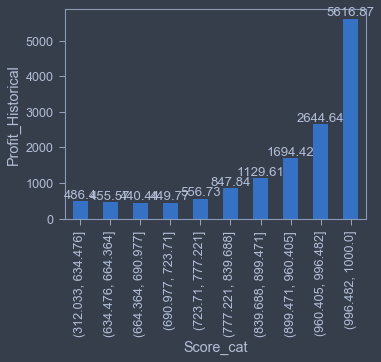

In [174]:
score_distribution(predict, 'Score', 10, 'Profit_Historical')

### Score Distribution - Static Pool

Score_cat
(312.033, 634.476]    902
(634.476, 664.364]    901
(664.364, 690.977]    902
(690.977, 723.71]     901
(723.71, 777.221]     902
(777.221, 839.688]    901
(839.688, 899.471]    901
(899.471, 960.405]    902
(960.405, 996.482]    901
(996.482, 1000.0]     902
Name: StaticPool_Recent, dtype: int64


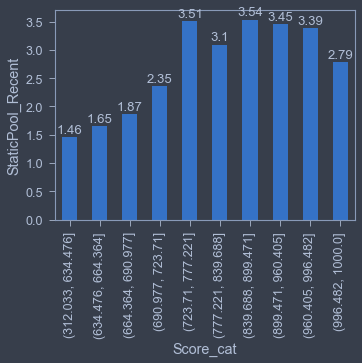

In [175]:
score_distribution(predict, 'Score', 10, 'StaticPool_Recent')

### Score Distribution - WO Percentage

Score_cat
(312.033, 634.476]    902
(634.476, 664.364]    901
(664.364, 690.977]    902
(690.977, 723.71]     901
(723.71, 777.221]     902
(777.221, 839.688]    901
(839.688, 899.471]    901
(899.471, 960.405]    902
(960.405, 996.482]    901
(996.482, 1000.0]     902
Name: PDType, dtype: int64


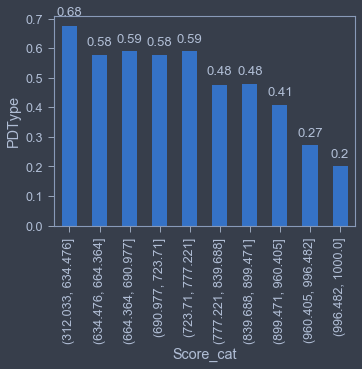

In [176]:
score_distribution(predict, 'Score', 10, 'PDType')

### Feature Importance

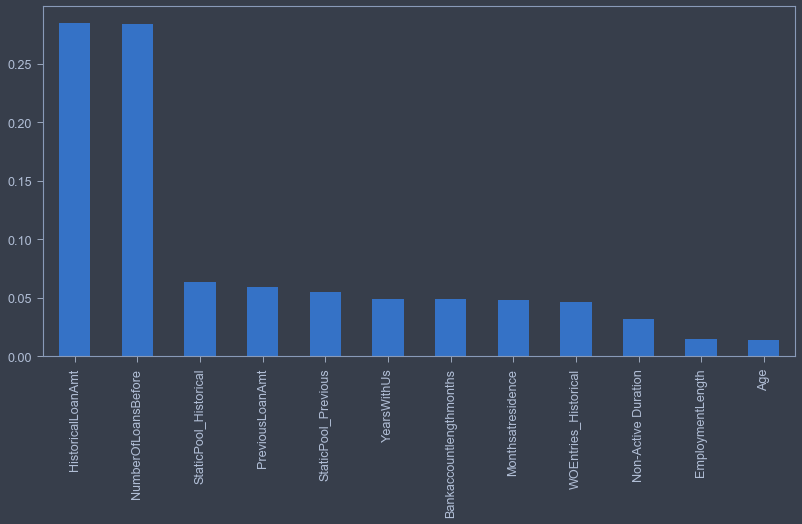

In [177]:
importance = pd.Series(xgb_model.feature_importances_)
importance.index = X_train.columns
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(12,6))

# Proposal of Lower Interest Rate and Max Loan Amount
- Score[<562]: 0.3, NO INCREASE OF AMOUNT
- Score[562-689] : 0.3, NO INCREASE OF AMOUNT
- Score[690-850] : 0.3, increase 200
- Score[851-949] : 0.27, increase 300
- Score[>=950]: 0.25, increase 400

Score_cat
(246.166, 558.206]    902
(558.206, 628.795]    901
(628.795, 692.559]    902
(692.559, 765.789]    901
(765.789, 851.454]    902
(851.454, 915.296]    901
(915.296, 948.336]    901
(948.336, 969.701]    902
(969.701, 983.392]    901
(983.392, 997.463]    902
Name: IfLoss, dtype: int64


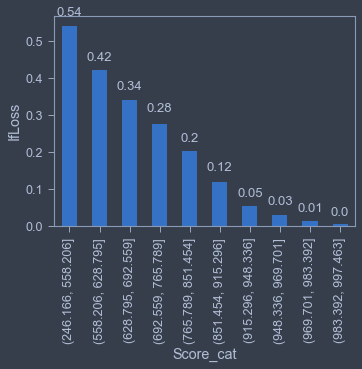

In [201]:
def score_distribution(dataset, var, bin_num, target_Var):
    var_discretised, intervals = pd.qcut(dataset[var], bin_num, labels=None, retbins=True, precision=3, duplicates='raise')
    # NewScore_discretised = pd.cut(dataset.NewFT_Score, 10)
    dataset[var +'_cat'] = var_discretised   # categorical variable

    a = dataset.groupby([var +'_cat'])[target_Var].sum() / dataset.groupby(var +'_cat')[target_Var].count()  #np.float(len(data))
    c = dataset.groupby([var +'_cat'])[target_Var].count()
    
    x = dataset[var +'_cat'].unique().astype(str)
    y = round(a, 2)
    #  print "{0:.0%}".format(1./3)  
    print(c)
    a.columns = [target_Var]
    a.plot(kind = 'bar')
    for x, y in zip(range(len(x)), y):
        plt.text(x, y + 0.02, y, ha = 'center', va = 'bottom')
    plt.xticks(rotation= 90)
    plt.ylabel(target_Var)

score_distribution(predict, 'Score', 10, 'IfLoss')

## Updated Risk-based Pricing
- Score[<558]: 0.3, NO INCREASE OF AMOUNT

- Score[559-692] : 0.3, NO INCREASE OF AMOUNT

- Score[693-851] : 0.3, increase 200

- Score[852-969] : 0.27, increase 300

- Score[>=970]: 0.25, increase 400

# Apply the Model for Future Prediction

## Amazon Gift Card Campaign

In [44]:
raw_data = pd.read_csv('C:/Users/brigh/OneDrive - The Strategic Group/MPD-MFC/Risk-based Pricing/renewal including active.csv')
# gift = pd.read_csv('C:/Users/brigh/OneDrive - The Strategic Group/MPD-MFC/Risk-based Pricing/AMAZON GIFT CARD LIST.csv')
gift = pd.read_csv('C:/Users/brigh/OneDrive - The Strategic Group/MPD-MFC/Risk-based Pricing/renewal customers sent with campaign.csv')
renewal_gift = gift #pd.merge(gift, raw_data, how = 'left', on = 'ApplicantID')
renewal_gift['IfFunded'] = np.where(renewal_gift['FundedAmount'].isnull() == False, 1, 0) 
funded = renewal_gift[renewal_gift['IfFunded']==1]

In [45]:
funded.describe()

,CustomerId,MinFirmOffer,MaxFirmOffer,MaxRenewalAmount,PTL,Score,InterestRate,SuggestedAmount,FundedAmount,IsCycled,IsFPD,IsZPD,IfFunded
count,164.000000,164.000000,164.000000,164.000000,163.000000,164.000000,164.000000,164.000000,164.000000,164.00000,164.0,164.0,164.0
mean,109066.036585,541.463415,841.463415,880.487805,3.220123,879.231707,0.271768,275.000000,603.658537,0.02439,0.0,0.0,1.0
std,26461.958771,188.927369,188.927369,270.849164,2.461363,125.812432,0.029845,126.963112,343.545256,0.15473,0.0,0.0,0.0
min,15726.000000,300.000000,600.000000,300.000000,1.000000,529.000000,0.000000,0.000000,200.000000,0.00000,0.0,0.0,1.0
25%,99332.500000,400.000000,700.000000,700.000000,1.300000,784.750000,0.250000,200.000000,300.000000,0.00000,0.0,0.0,1.0
50%,119488.000000,500.000000,800.000000,900.000000,2.500000,949.500000,0.270000,300.000000,500.000000,0.00000,0.0,0.0,1.0
75%,127651.000000,700.000000,1000.000000,1000.000000,4.000000,976.250000,0.300000,400.000000,800.000000,0.00000,0.0,0.0,1.0
max,135777.000000,1200.000000,1500.000000,1500.000000,14.640000,995.000000,0.300000,400.000000,1500.000000,1.00000,0.0,0.0,1.0


Score_cat
(-0.001, 499.0]    1006
(499.0, 579.0]      996
(579.0, 636.0]      990
(636.0, 685.0]      997
(685.0, 737.0]     1002
(737.0, 800.0]      986
(800.0, 867.0]     1005
(867.0, 926.6]      984
(926.6, 966.0]     1021
(966.0, 995.0]      971
Name: IfFunded, dtype: int64


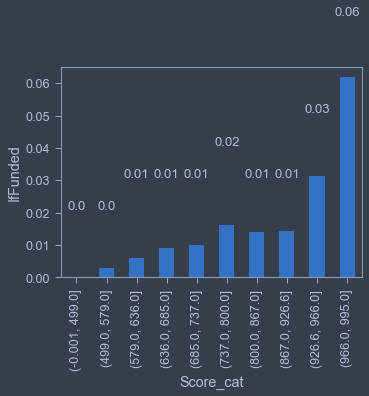

In [43]:
score_distribution(renewal_gift, 'Score', 10, 'IfFunded')

In [51]:
renewal_gift[(renewal_gift['Score'] >= 852)].to_csv('customers to send lower interest campaign.csv')

In [49]:
renewal_gift[(renewal_gift['Score'] >= 970) ].describe()

,CustomerId,MinFirmOffer,MaxFirmOffer,MaxRenewalAmount,PTL,Score,InterestRate,SuggestedAmount,FundedAmount,IsCycled,IsFPD,IsZPD,IfFunded
count,863.000000,863.000000,863.000000,863.000000,861.000000,863.000000,863.00,863.0,56.000000,56.000000,56.0,56.0,863.000000
mean,92758.849363,533.951333,833.951333,946.697567,2.478606,980.082271,0.25,400.0,655.357143,0.017857,0.0,0.0,0.064890
std,29567.797926,184.978916,184.978916,274.829810,1.765166,6.556479,0.00,0.0,425.513441,0.133631,0.0,0.0,0.246474
min,62.000000,300.000000,600.000000,300.000000,1.000000,970.000000,0.25,400.0,200.000000,0.000000,0.0,0.0,0.000000
25%,81055.500000,400.000000,700.000000,700.000000,1.300000,975.000000,0.25,400.0,300.000000,0.000000,0.0,0.0,0.000000
50%,97013.000000,500.000000,800.000000,900.000000,1.900000,979.000000,0.25,400.0,500.000000,0.000000,0.0,0.0,0.000000
75%,114492.000000,700.000000,1000.000000,1100.000000,2.800000,985.000000,0.25,400.0,1000.000000,0.000000,0.0,0.0,0.000000
max,134280.000000,1200.000000,1500.000000,1500.000000,14.920000,995.000000,0.25,400.0,1500.000000,1.000000,0.0,0.0,1.000000


In [22]:
renewal_gift.to_csv('renewal_gift.csv')

In [28]:
renewal_gift = pd.read_csv('renewal_gift.csv')

## Score Current Stored/WO Customers, Add Max Loan Amount and Interest Rate

In [29]:
import json
import joblib

# Called when a request is received
def run(raw_data):
    # pass raw_data as string
    global data
#     data = pd.DataFrame(raw_data)
    data = raw_data.copy()
#    load the model
#     model = joblib.load('C:/Users/brigh/OneDrive - The Strategic Group/MPD-MFC/Risk-based Pricing/xgb_renewal_model.pkl')
    model = joblib.load('C:/Users/brigh/OneDrive - The Strategic Group/Model Deployment/MPD renewal model v1.1 deployment files/xgb_renewal_model.pkl')
    data_fitting = pre_processing(data)
    predictions = model.predict(data_fitting)
    prob = model.predict_proba(data_fitting)
    score = prob[:,0]*1000
#     # Return the predictions as any JSON serializable format
    data_fitting['Score'] = score
    return data_fitting
#[['Score', 'race', 'sex', 'State', 'flag_luxury_make', 'CarAge', 'AgeOfCustomer', 'addvert', 'flag_email', 'flag_CompanyName', 'flag_employment', 'flag_companyPhone', 'flag_companyPosition', 'paidFrequency', 'AnnualSalary', \
          #  'CarValue', 'flag_spouse']]
#     return predictions.tolist(), prob.tolist(), score.tolist()

def pre_processing(data):
    # clean Salary
    list_i = []
    list_j = []
    for i in data['Salary']:
    #     print(i, type(i))
        if type(i) == str:
            if i[0] == '$':
                i = i[1:]
            if i[1] == '.' and i[-3] == '.':
                i = i[0] + i[2:]
        list_i.append(i)
        
    for j in data['EmploymentLength']:
        if type(j) == str:
            if 'N' in j or '/' in j or 'o' in j or 'NULL' in j or j == '':
                j = 0
        list_j.append(j)
    data['Salary'] = list_i
    data['EmploymentLength'] = list_j
    data['EmploymentLength'].fillna(3, inplace = True)
    data = data[(data['PreviousLoanAmt'].isnull() == False) & (data['PreviousLoanAmt'] != 0) #& (data['LastPaymentDate'].isnull() == False)
                      & (data['Pay_Previous'].isnull() == False) & (data['YearsWithUs'] >= 0)]
#     data['Age'] = (pd.to_datetime(data['FundedDate_Recent']) - pd.to_datetime(data['DOB']))/np.timedelta64(1,'Y')
    data['Salary'] = data['Salary'].astype(float)
    data['PreviousLoanAmt'] = data['PreviousLoanAmt'].astype(float)
    data['Bankaccountlengthmonths'] = data['Bankaccountlengthmonths'].astype(float)
    data['Monthsatresidence'] = data['Monthsatresidence'].astype(float)
    data['EmploymentLength'] = data['EmploymentLength'].astype(float)
    data['Salary'].fillna(data['Salary'].median(), inplace = True)
    data['Bankaccountlengthmonths'].fillna(data['Bankaccountlengthmonths'].median(), inplace = True)
    data['Monthsatresidence'].fillna(data['Monthsatresidence'].median(), inplace = True)
#     data['StaticPool_Historical'] = data['Pay_Historical']/data['HistoricalLoanAmt']
#     data['StaticPool_Previous'] = data['Pay_Previous']/data['PreviousLoanAmt']
    
    train_vars = ['StaticPool_Historical', 'StaticPool_Previous', 'Age', 'YearsWithUs', 'NumberOfLoansBefore', 'Non-Active Duration',  'PreviousLoanAmt', 'HistoricalLoanAmt',  'Bankaccountlengthmonths', 'Monthsatresidence', 'EmploymentLength', 'WOEntries_Historical']
    data_new = data[train_vars]
    return data_new

# with open('C:/Users/brigh/OneDrive - The Strategic Group/MPD-MFC/Risk-based Pricing/Results2.json', 'r') as file_object:
#     raw_data = json.load(file_object)
    
# raw_data = pd.read_csv('C:/Users/brigh/OneDrive - The Strategic Group/MPD-MFC/Risk-based Pricing/data for deployment test2.csv')
# raw_data = pd.read_csv('C:/Users/brigh/OneDrive - The Strategic Group/MPD-MFC/Risk-based Pricing/renewal data.csv')
# raw_data = pd.read_csv('C:/Users/brigh/OneDrive - The Strategic Group/MPD-MFC/Risk-based Pricing/renewal data 040821.csv')
raw_data = renewal_gift
raw_data['HistoricalLoanAmt'] = raw_data['TotalLoanAmt'] - raw_data['RecentLoanAmt']
raw_data['StaticPool_Recent'] = raw_data['Pay_Recent']/raw_data['RecentLoanAmt']
raw_data['StaticPool_Historical'] = raw_data['Pay_Historical']/(raw_data['TotalLoanAmt'] - raw_data['RecentLoanAmt'])
raw_data['StaticPool_Previous'] = raw_data['Pay_Previous']/raw_data['PreviousLoanAmt']
raw_data['StaticPool_Overall'] = raw_data['TotalPay']/raw_data['TotalLoanAmt']
raw_data['IfLoss'] = np.where(raw_data['StaticPool_Recent'] < 1, 1, 0)
    
result = run(raw_data)

data = raw_data.copy()
data['Score'] = result['Score']
# (246.166, 558.206]    902
# (558.206, 628.795]    901
# (628.795, 692.559]    902
# (692.559, 765.789]    901
# (765.789, 851.454]    902
# (851.454, 915.296]    901
# (915.296, 948.336]    901
# (948.336, 969.701]    902
# (969.701, 983.392]    901
# (983.392, 997.463]    902
data.loc[data['Score']<=558.206, 'Score_cat'] = 10
data.loc[ (data['Score']>558.206) & (data['Score']<=628.795), 'Score_cat'] = 9
data.loc[ (data['Score']>628.795) & (data['Score']<=692.559), 'Score_cat'] = 8
data.loc[ (data['Score']>692.559) & (data['Score']<=765.789), 'Score_cat'] = 7
data.loc[ (data['Score']>765.789) & (data['Score']<=851.454), 'Score_cat'] = 6
data.loc[ (data['Score']>851.454) & (data['Score']<=915.296), 'Score_cat'] = 5
data.loc[ (data['Score']>915.296) & (data['Score']<=948.336), 'Score_cat'] = 4
data.loc[ (data['Score']>948.336) & (data['Score']<=969.701), 'Score_cat'] = 3
data.loc[ (data['Score']>969.701) & (data['Score']<=983.392), 'Score_cat'] = 2
data.loc[ (data['Score']>983.392) & (data['Score']<=997.463), 'Score_cat'] = 1

data.loc[data['Score']<=692, 'RenewalLoanAmt'] = data['PreviousLoanAmt']
data.loc[ (data['Score']>692) & (data['Score']<=851), 'RenewalLoanAmt'] = data['PreviousLoanAmt']+200
data.loc[ (data['Score']>851) & (data['Score']<=969), 'RenewalLoanAmt'] = data['PreviousLoanAmt']+300
data.loc[ (data['Score']>969), 'RenewalLoanAmt'] = data['PreviousLoanAmt']+400

data.loc[data['Score']<=692, 'InterestRate'] = 0.3
data.loc[ (data['Score']>692) & (data['Score']<=851), 'InterestRate'] = 0.3
data.loc[ (data['Score']>851) & (data['Score']<=969), 'InterestRate'] = 0.27
data.loc[ (data['Score']>969), 'InterestRate'] = 0.25

data.describe()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

,Unnamed: 0,RenewalPortfolioServiceInputOutputId,ApplicantID,ModelScore,InterestRate,SuggestedAmount,Score,EmploymentLength,Bankaccountlengthmonths,Monthsatresidence,...,YearsWithUs,Non-Active Duration,HistoricalLoanAmt,StaticPool_Recent,StaticPool_Historical,StaticPool_Previous,StaticPool_Overall,IfLoss,Score_cat,RenewalLoanAmt
count,10337.0000,10337.0000,10337.000000,10337.000000,10337.000000,10337.000000,220.000000,170.000000,0.0,0.0,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,10337.000000,220.000000,220.000000
mean,5168.0000,5169.0000,86109.209345,732.142240,0.238854,157.163587,893.026062,6.047059,NaN,NaN,...,843.118182,151.631818,3020.136364,2.876785,1.881697,2.023423,2.160972,0.000097,3.895455,637.727273
std,2984.1792,2984.1792,38712.184956,183.716268,0.107351,143.719133,126.857864,6.031291,NaN,NaN,...,1012.922259,489.050058,3973.424017,3.634529,1.095071,1.849056,1.271926,0.009836,2.416265,215.780030
min,0.0000,1.0000,16.000000,100.120000,0.000000,0.000000,434.619904,0.000000,NaN,NaN,...,14.000000,0.000000,100.000000,0.000000,0.317460,1.000000,0.403846,0.000000,1.000000,100.000000
25%,2584.0000,2585.0000,57954.000000,605.270000,0.250000,0.000000,854.482483,2.000000,NaN,NaN,...,109.750000,5.000000,600.000000,1.250000,1.241177,1.000000,1.354167,0.000000,2.000000,500.000000
50%,5168.0000,5169.0000,96278.000000,735.850000,0.300000,200.000000,956.267395,4.000000,NaN,NaN,...,469.500000,18.000000,1569.000000,1.708333,1.528022,1.250000,1.763926,0.000000,3.000000,600.000000
75%,7752.0000,7753.0000,119186.000000,896.400000,0.300000,300.000000,977.789612,9.000000,NaN,NaN,...,1141.750000,90.250000,3625.000000,2.664975,2.251122,2.344417,2.581057,0.000000,5.000000,700.000000
max,10336.0000,10337.0000,135792.000000,995.290000,0.300000,400.000000,991.529846,34.000000,NaN,NaN,...,5198.000000,5894.000000,23250.000000,38.783800,9.060403,13.500000,10.187500,1.000000,10.000000,1300.000000


In [30]:
data.to_csv('amazon gift card campaign_score.csv')

In [31]:
for i in data.columns:
    print(i)

Unnamed: 0
RenewalPortfolioServiceInputOutputId
RequestId
ApplicantID
ModelName
InputDateTime
Input
OutputDateTime
Output
ModelRequest
ModelScore
InterestRate
SuggestedAmount
Score
Status
StatusDetail
SSN
Email
FirstDateEver
FundedDate_Recent
LastPaymentDate
Payroll Freq
PDType
EmploymentLength
Bankaccountlengthmonths
Monthsatresidence
Salary
Age
RiskScore
NewFTScore
TotalLoanAmt
RecentLoanAmt
PreviousLoanAmt
NumberOfLoansBefore
TotalPay
Pay_Recent
Profit_Recent
Pay_Historical
Profit_Historical
Pay_Previous
Profit_Previous
WOEntries_Previous
WOEntries_Historical
WOAmount_Previous
WOAmount_Historical
YearsWithUs
Non-Active Duration
HistoricalLoanAmt
StaticPool_Recent
StaticPool_Historical
StaticPool_Previous
StaticPool_Overall
IfLoss
Score_cat
RenewalLoanAmt


In [40]:
# raw_data['Score'] = data['Score']

def score_distribution(dataset, var, bin_num, target_Var):
    var_discretised, intervals = pd.qcut(dataset[var], bin_num, labels=None, retbins=True, precision=3, duplicates='raise')
    # NewScore_discretised = pd.cut(dataset.NewFT_Score, 10)
    dataset[var +'_cat'] = var_discretised   # categorical variable

    a = dataset.groupby([var +'_cat'])[target_Var].sum() / dataset.groupby(var +'_cat')[target_Var].count()  #np.float(len(data))
    c = dataset.groupby([var +'_cat'])[target_Var].count()
    
    x = dataset[var +'_cat'].unique().astype(str)
    y = round(a, 2)
    #  print "{0:.0%}".format(1./3)  
    print(c)
    a.columns = [target_Var]
    a.plot(kind = 'bar')
    for x, y in zip(range(len(x)), y):
        plt.text(x, y + 0.02, y, ha = 'center', va = 'bottom')
    plt.xticks(rotation= 90)
    plt.ylabel(target_Var)

score_distribution(raw_data, 'Score', 10, 'IfLoss')

KeyError: 'Column not found: IfFunded'

## Distribution of Qualified Customers

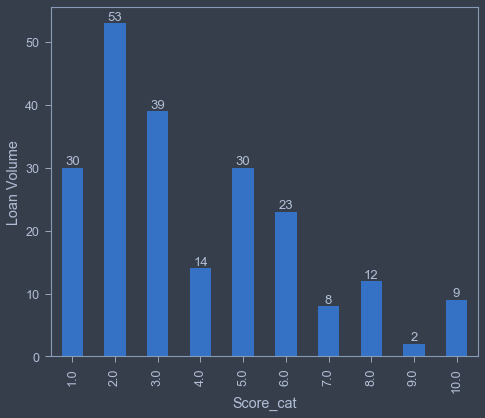

In [33]:
def plot_cat(dataset, cols):
    col = True
    for var in cols:
        if col == True:
            plt.figure(figsize=(15,6))
            plt.subplot(1, 2, 1)
            col = False
        else:
            plt.subplot(1, 2, 2)
            col = True
        fig = dataset.groupby([var])['Score'].count().plot(kind = 'bar')
        x = dataset[var].unique().astype(str)
        y = round(dataset.groupby([var])['Score'].count(), 2)
        fig.set_ylabel('Loan Volume')
        fig.set_xlabel(var)
        for x, y in zip(range(len(x)), y):
            plt.text(x, y + 0.02, y, ha = 'center', va = 'bottom')

cols = ['Score_cat']
plot_cat(data, cols)

# Impact Analysis

### Target Customers
Currently out of all 88829 stored/WO customers, only 27778 customers had more than one loan (at least one renewal) with us which is 31.3%. This is close to our 60/40 rule, but we could improve further by offering those customers which are predicted as good the lower interest rates to stimulate them to apply for renewals.

Based on the scoring ranking of this renewal model, we will select customers from those 88829 customers and mainly target the customers scored within 7 highest ranked buckets. We define first tier customers as the ones located within bucket 1-3, second tier as the ones in bucket 4-5, third tier as the ones in bucket 6-7. We will send the list of these three tiers customers to Marketing for campaign:

- 6390 customers would qualify for first tier

- 20014 customers would qualify for the second tier

- 27148 customers would qualify for the third tier. 

- In total we will target 53552 customers. 

### Success Senarios

Since there would be almost no acquisition cost for renewals:

- If without this model and the application rate is as status quo:
    - Average profit from the renewal customers on their newest loan: $698.7
    - Static pool: 2.63
    - The total profit from these customers: 11,711,452.9

- If with this model and the application rate is improved to 35% which is 11.8% greater than the status quo:
    - Average profit from these customers on their newest loan: 915.5 which lifted by 31%
    - static pool: 3.37 which lifted by 28.1%
    - Total profit from these customers: 17,159,399.6 which lifted by 46.5%
    
- If with this model and the application rate is improved to 40% which is 27.8% greater than the status quo:
    - Average profit from these customers on their newest loan: 915.5 which lifted by 31%
    - static pool: 3.37 which lifted by 28.1%
    - Total profit from these customers: 19,610,742.4 which lifted by 67.4%
    
- If with this model and the application rate is improved to 45% which is 43.7% greater than the status quo: 
    - Average profit from these customers on their newest loan: 915.5 which lifted by 31%, 
    - Static pool: 3.37 which lifted 28.1%
    - Total profit from these customers: 22,062,085.2 which lifted by 88.3%